<a href="https://colab.research.google.com/github/berbir12/ML-Regression/blob/main/AirQualityForecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
from sklearn.linear_model import Lasso

In [60]:
data = pd.read_csv("/content/global air pollution dataset.csv")
data.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good


In [61]:
data.shape

(23463, 12)

In [62]:
data.isnull().sum()

Country               427
City                    1
AQI Value               0
AQI Category            0
CO AQI Value            0
CO AQI Category         0
Ozone AQI Value         0
Ozone AQI Category      0
NO2 AQI Value           0
NO2 AQI Category        0
PM2.5 AQI Value         0
PM2.5 AQI Category      0
dtype: int64

In [63]:
X = data.drop(["Country","City","AQI Value"], axis=1)
Y = data["AQI Value"]

In [64]:
data.replace({"AQI Category": {"Good": "0","Moderate": "1", "Unhealthy": "2","Unhealthy for Sensitive Groups":"3","Very Unhealthy":"4", "Hazardous":5 }}, inplace=True)
data.replace({"CO AQI Category": {"Good": "0","Moderate": "1", "Unhealthy": "2","Unhealthy for Sensitive Groups":"3","Very Unhealthy":"4", "Hazardous":5  }}, inplace=True)
data.replace({"Ozone AQI Category": {"Good": "0","Moderate": "1", "Unhealthy": "2","Unhealthy for Sensitive Groups":"3","Very Unhealthy":"4", "Hazardous":5  }}, inplace=True)
data.replace({"NO2 AQI Category": {"Good": "0","Moderate": "1", "Unhealthy": "2","Unhealthy for Sensitive Groups":"3","Very Unhealthy":"4", "Hazardous":5  }}, inplace=True)
data.replace({"PM2.5 AQI Category": {"Good": "0","Moderate": "1", "Unhealthy": "2","Unhealthy for Sensitive Groups":"3","Very Unhealthy":"4", "Hazardous":5  }}, inplace=True)
data.replace({"PM2.5 AQI Value":{"NaN": "-1"}})
data.replace({"PM2.5 AQI Category":{"NaN": "-1"}})

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,1,1,0,36,0,0,0,51,1
1,Brazil,Presidente Dutra,41,0,1,0,5,0,1,0,41,0
2,Italy,Priolo Gargallo,66,1,1,0,39,0,2,0,66,1
3,Poland,Przasnysz,34,0,1,0,34,0,0,0,20,0
4,France,Punaauia,22,0,0,0,22,0,0,0,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...
23458,India,Gursahaiganj,184,2,3,0,154,2,2,0,184,2
23459,France,Sceaux,50,0,1,0,20,0,5,0,50,0
23460,India,Mormugao,50,0,1,0,22,0,1,0,50,0
23461,United States of America,Westerville,71,1,1,0,44,0,2,0,71,1


In [65]:
print(data)

                        Country              City  AQI Value AQI Category  \
0            Russian Federation        Praskoveya         51            1   
1                        Brazil  Presidente Dutra         41            0   
2                         Italy   Priolo Gargallo         66            1   
3                        Poland         Przasnysz         34            0   
4                        France          Punaauia         22            0   
...                         ...               ...        ...          ...   
23458                     India      Gursahaiganj        184            2   
23459                    France            Sceaux         50            0   
23460                     India          Mormugao         50            0   
23461  United States of America       Westerville         71            1   
23462                  Malaysia            Marang         70            1   

       CO AQI Value CO AQI Category  Ozone AQI Value Ozone AQI Category  \


In [66]:
X = data.drop(["City", "Country", "AQI Value"], axis = 1)
Y = data["AQI Value"]

In [67]:
print(X)
print(Y)

      AQI Category  CO AQI Value CO AQI Category  Ozone AQI Value  \
0                1             1               0               36   
1                0             1               0                5   
2                1             1               0               39   
3                0             1               0               34   
4                0             0               0               22   
...            ...           ...             ...              ...   
23458            2             3               0              154   
23459            0             1               0               20   
23460            0             1               0               22   
23461            1             1               0               44   
23462            1             1               0               38   

      Ozone AQI Category  NO2 AQI Value NO2 AQI Category  PM2.5 AQI Value  \
0                      0              0                0               51   
1                

In [68]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.1, random_state=2)

In [69]:
linReg = LinearRegression()

In [70]:
linReg.fit(X_train, Y_train)

LinearRegression()

In [71]:
train_data_pred = linReg.predict(X_train)

In [73]:
error_score = metrics.r2_score(Y_train, train_data_pred)
print("R Squared Error: ", error_score)

R Squared Error:  0.9772798302632446


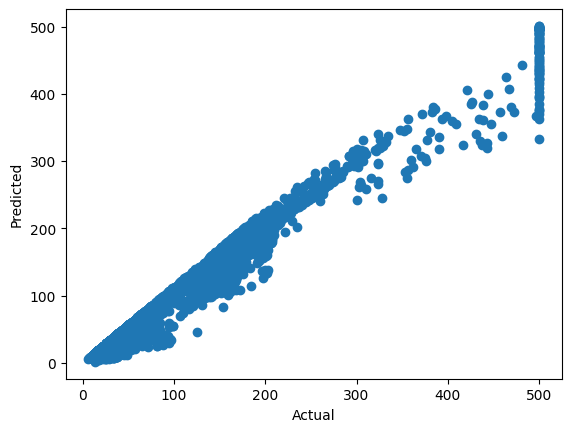

In [96]:
plt.scatter(Y_train, train_data_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [76]:
test_data_pred = linReg.predict(X_test)

In [78]:
error_score = metrics.r2_score(Y_test, test_data_pred)
print("R Squared Error: ", error_score)

R Squared Error:  0.9775701180194086


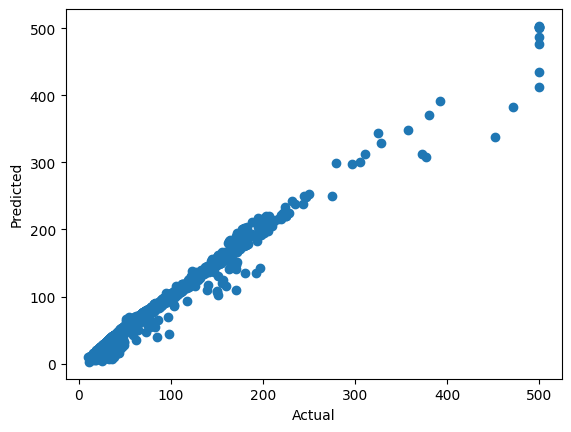

In [95]:
plt.scatter(Y_test, test_data_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [85]:
lassoReg = Lasso()

In [87]:
lassoReg.fit(X_train, Y_train)

Lasso()

In [89]:
train_data_pred = lassoReg.predict(X_train)

In [91]:
error_score = metrics.r2_score(Y_train, train_data_pred)
print("R Squared Error: ", error_score)

R Squared Error:  0.9745538066553971


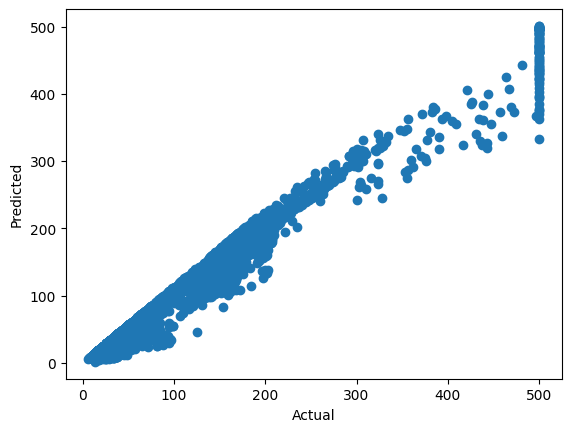

In [94]:
plt.scatter(Y_train, train_data_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()